# **Dağılım Grafikleri**

## **Barplot (Sütun Grafik)**

Sütun grafikler elimizdeki categoric değişkenleri görselleştirmek için kullanılr

**Veri Seti Hikayesi**
* price: dolar cinsinde fiyat (326-18,823)
* caret: ağırlık (0.2-5.01)
* cut: kalite (Fair,Good,Very Good,Premium,Ideal)
* color: renk(from J(worst) to D (best))
* clarity: temizliği, berraklığı(I1(worst),SI2,SI1,VS2,VS1,VVS2,VVS1,IF(best))
* x: length in mm(0-10.74)
* y: width in mm(0-58.9)
* z:depth in mm(0-31.8)
* depth: toplam derinlik yüzdesi = z/mean(x,y)=2*z/(x+y)(43-79)
* table: elmasın en geniş noktasına göre genişliği (43-95)

In [2]:
import seaborn as sns
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Veri Setine Hızlı Bakış**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [8]:
df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [11]:
#ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [12]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [14]:
df.cut= df.cut.astype(CategoricalDtype(ordered=True))

In [15]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [17]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [24]:
#ordinal sıralamasını düzenleme
cut_kategoriler=["Fair","Good","Very Good","Premium","Ideal"]

In [25]:
df.cut= df.cut.astype(CategoricalDtype(categories=cut_kategoriler,ordered=True))

In [26]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

**Sütun Grafiğin (Bar Plot) Oluşturulması**

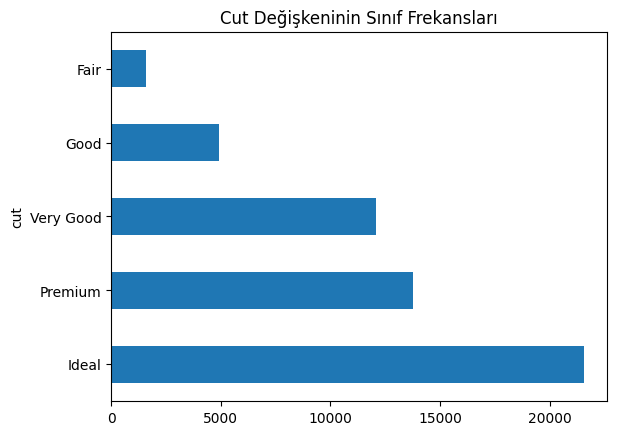

In [31]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

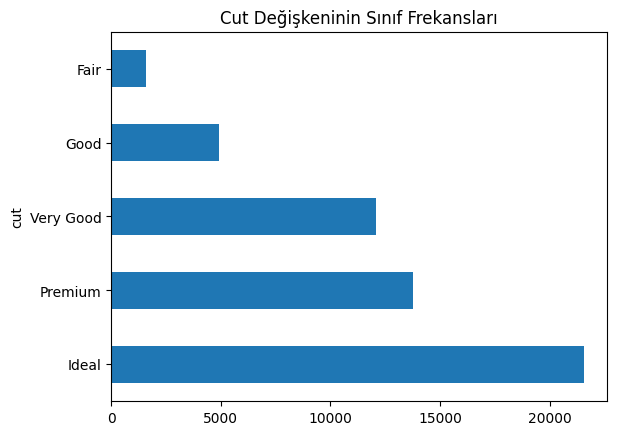

In [32]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

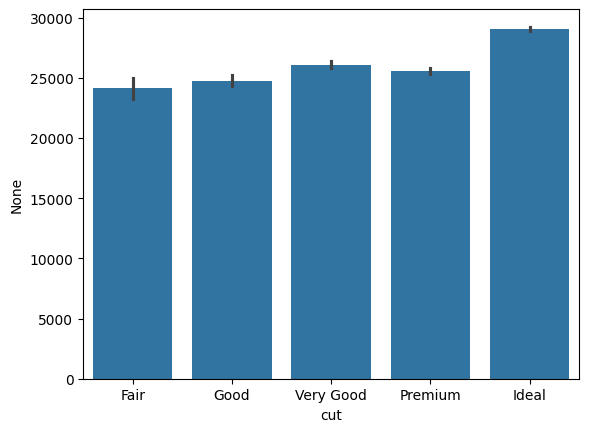

In [41]:
sns.barplot(x = "cut" , y = df.cut.index , data=df);

**Sütun Grafik Çaprazlamalar**
Veri setindeki değişkenlerin birlikte değerlendirilmesi.

In [2]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds= sns.load_dataset("diamonds")
df=diamonds.copy()
cut_kategoriler=["Fair","Good","Very Good","Premium","Ideal"]
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategoriler,ordered=True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


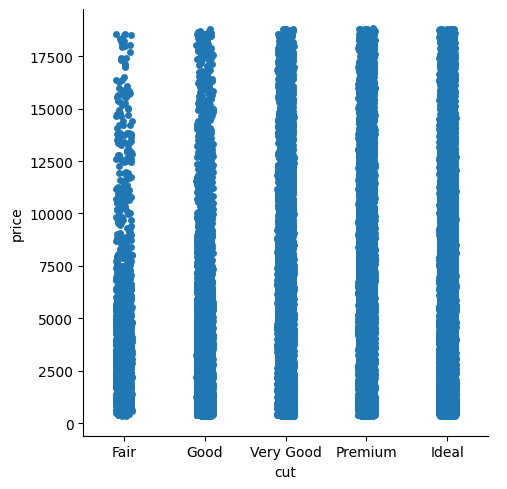

In [7]:
sns.catplot(x="cut", y="price",data=df);

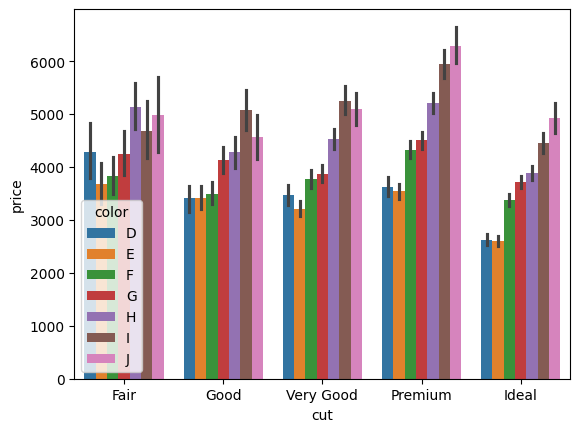

In [8]:
sns.barplot(x="cut", y="price",hue="color",data=df);

In [13]:
#üstteki grafiği doğrulama
df.groupby(["cut","color"],observed=True)["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

## **Histogram ve Yoğunluk Grafikleri**
**(Sayısal değişkenlerin dağılımını ifade etmek için kullanılır.)**

**Histogram ve Yoğunluk Grafiğinin Oluşturulması**

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


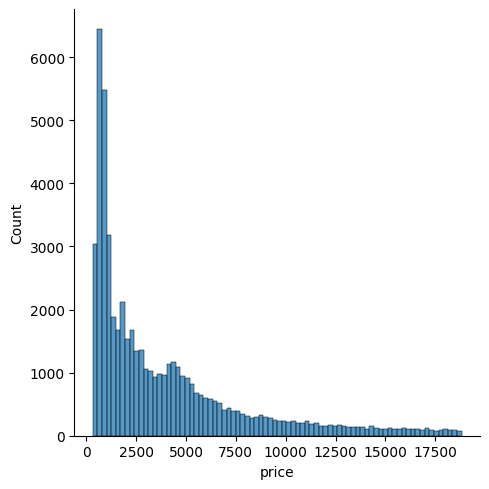

In [38]:
sns.displot(df,x="price",kde=False );

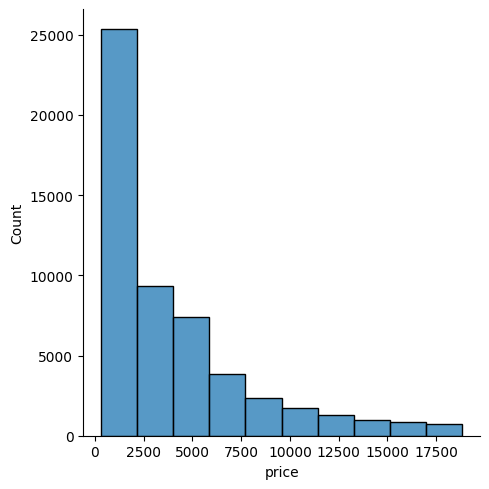

In [39]:
sns.displot(df,x="price", bins=10,kde=False );

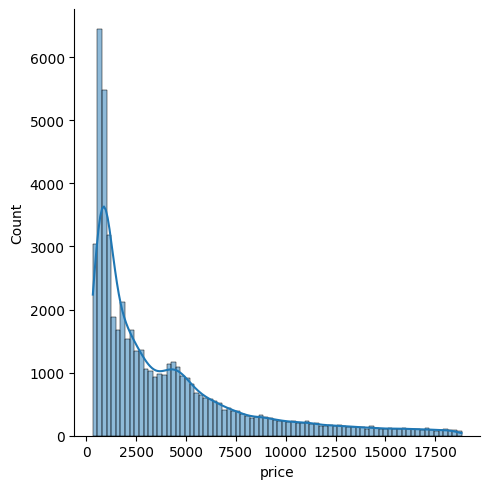

In [56]:
sns.displot(df.price,kde=True);

In [52]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

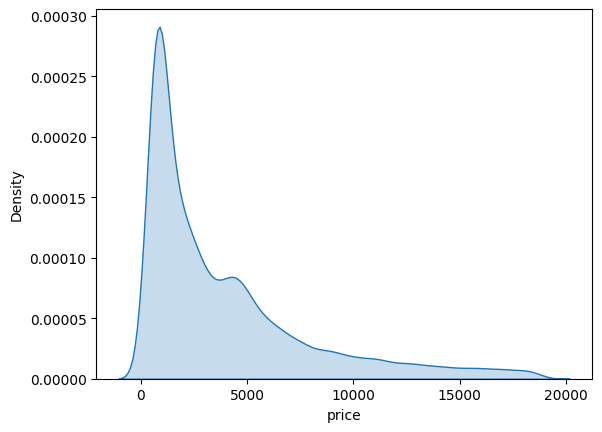

In [59]:
sns.kdeplot(df.price,fill=True);

**Histogram ve Yoğunluk Çaprazlamalar**

In [61]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


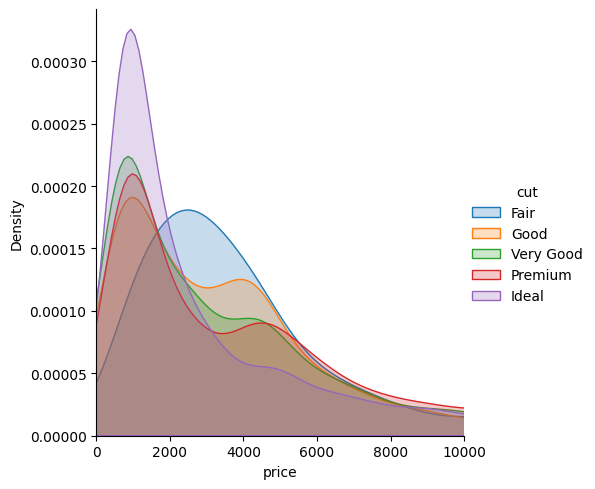

In [69]:
(sns
 .FacetGrid(df,
                hue="cut",
                height=5,
               xlim=(0,10000)
              )
.map(sns.kdeplot,"price",fill=True)
.add_legend()
);

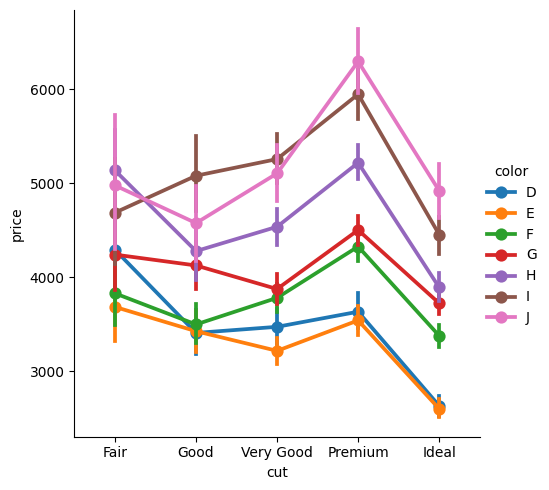

In [72]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df)

## **Boxplot**

Sayısal değişkenin dağılımı incelenmek isteniyorsa mutlaka histogramla beraber kutu grafiğininde anlaşılması lazımdır.

**Veri Seti Hikayesi**

* total_bill: Yemeğin toplam fiyatı (bahşiş ve vergi dahil)
* tip: Bahşiş
* sex: Ücreti ödeyen kişinin cinsiyeti
* smoker: Grupta sigara içen var mı (0=No,1=Yes)
* day: Gün (3=Thur,4=Fri,5=Sat,6=Sun)
* time: Ne zaman?
* size: Grupta kaç kişi var?

In [2]:
import seaborn as sns
tips=sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [6]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [7]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [8]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [9]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

**Kutu Grafiğinin (Box Plot) Oluşturulması**

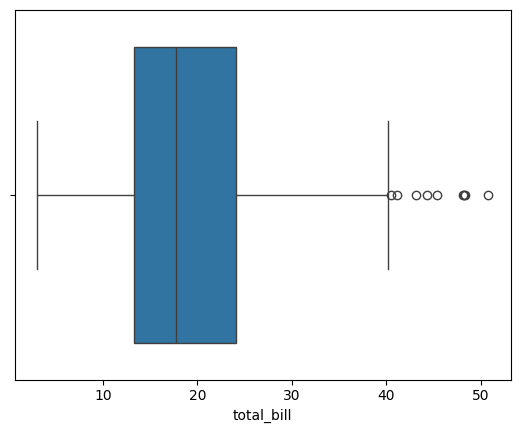

In [13]:
sns.boxplot(x=df["total_bill"]);
#Kartiller aracılığıyla bilgi sunar.
#Aykırı gözlem incelemelerinde yardımcı olur.

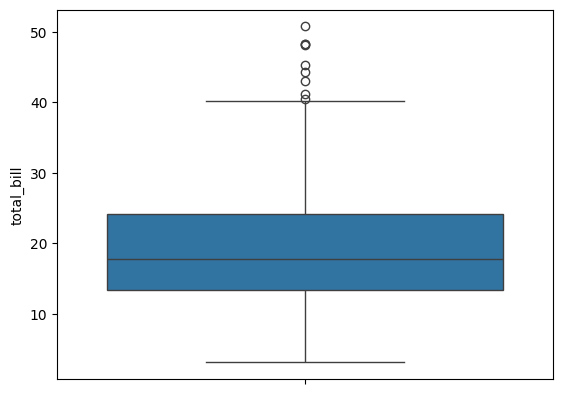

In [15]:
sns.boxplot(y=df["total_bill"]);

**Kutu Grafik (Box Plot) Çaprazlamalar**

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


<Axes: xlabel='day', ylabel='total_bill'>

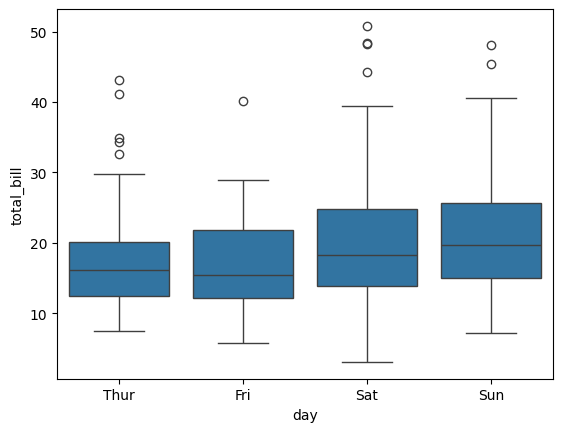

In [20]:
#Hangi günler daha fazla kazanıyoruz?
sns.boxplot(x="day",y="total_bill",data=df)

* Pazar günü daha fazla müşteri geldiği halde bu günde bırakılan para daha fazladır.
* Cumartesi günü en fazla müşteri geldiği halde bırakılan para pazar gününden azdır.
* Demekki pazar günü insanlar daha özel buluşmalar yapıyor yorumu çıkartılabilir.

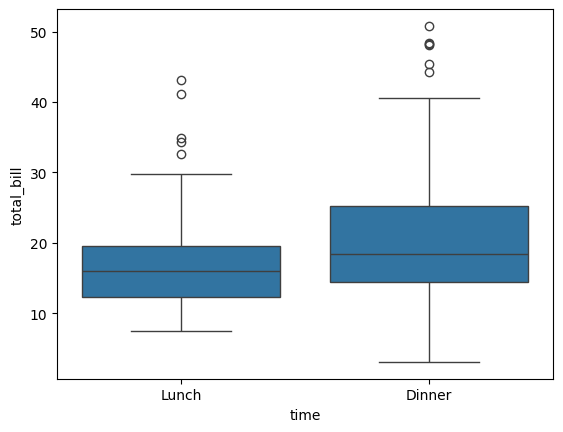

In [26]:
#Sabah mı akşam mı daha çok kazanıyoruz?
sns.boxplot(x="time",y="total_bill",data=df);

* Akşam yemeklerinde daha fazla para kazanılıyor.

<Axes: xlabel='size', ylabel='total_bill'>

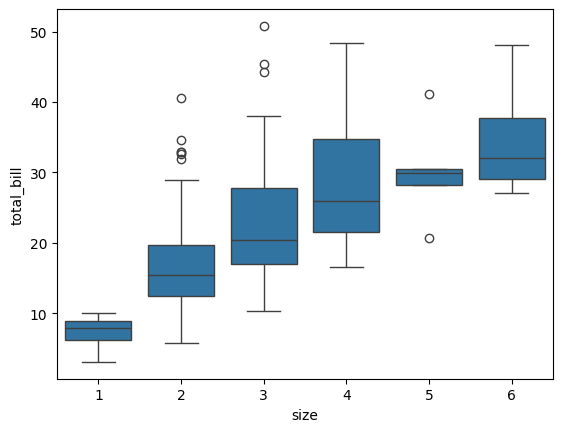

In [28]:
#Kişi sayısı - Kazanç
sns.boxplot(x="size",y="total_bill",data=df)

<Axes: xlabel='day', ylabel='total_bill'>

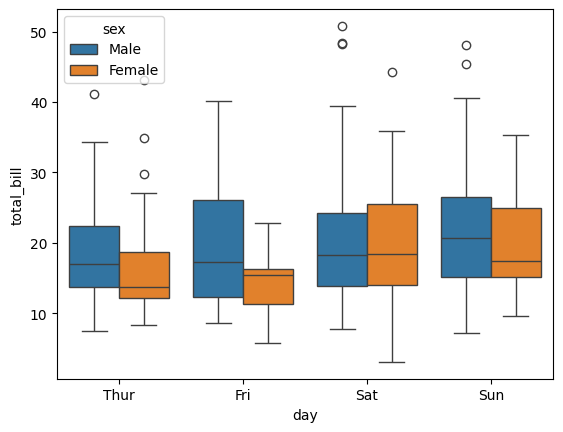

In [30]:
sns.boxplot(x="day",y="total_bill",hue="sex",data=df)